## 1. Perceptron Supporting Code

## Preceptron Example 1 - Ts vs Js - Step Through Manually
Manually walk through the training procedure of Figure 1.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Manually Code up examples
examples=np.array([[[1,1,1,-1], #T Shifted Left
                    [-1,1,-1,-1],
                    [-1,1,-1,-1],
                    [-1,1,-1,-1]],
                   [[-1,1,1,1], #T Shifted Right
                    [-1,-1,1,-1],
                    [-1,-1,1,-1],
                    [-1,-1,1,-1]],
                   [[-1,-1,1,-1], #J Shifted Left
                    [-1,-1,1,-1],
                    [1,-1,1,-1],
                    [1,1,1,-1]],
                   [[-1,-1,-1,1], #J Shifted Right
                    [-1,-1,-1,1],
                    [-1,1,-1,1],
                    [-1,1,1,1]]])

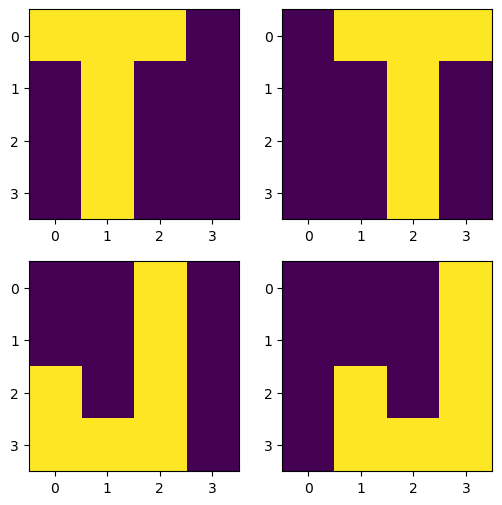

In [3]:
fig=plt.figure(0,(6,6))
for i in range(len(examples)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(examples[i])

In [4]:
# Setup labels - we want our machine to output positive voltage to T shapes, 
# our first 2 examples are Ts - so we'll set these values to +1, our second to 
# examples are Js - so we'll set these to -1s
y=np.array([1,1,-1,-1])

# Reshape each example into a row, and add a 17th column for the bias term
# Bias term is a like a switch that is "always on" - it's an extra parameter that doesn't depend on our input and helps our model learn. 
X=np.hstack((examples.reshape(-1, 16), np.ones((len(y),1)))) 

In [5]:
X.shape, y.shape

((4, 17), (4,))

In [6]:
X #1 row for each example

array([[ 1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,
         1., -1., -1.,  1.],
       [-1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
        -1.,  1., -1.,  1.],
       [-1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,
         1.,  1., -1.,  1.],
       [-1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,
         1.,  1.,  1.,  1.]])

In [7]:
#Initialized weights to zeros, this is equivalent to turning each knob to 12 o'clock
w = np.zeros(17)
lr=1.0 #Learning rate

In [8]:
i=1 #Start with index 1, converges a little faster than starting at index 0
yhat=np.dot(X[i],w) #Compute perceptron output by taking dot product of example X and weights.

In [9]:
yhat, y[i] #machine outputs 0, but we want it to output +1

(0.0, 1)

In [10]:
# Update weight following perceptron learning rule
# adding our learning rate times our example is equivalent 
# to turning up all our dials that are switched on, and turning 
# down all our dails that are switched off
w=w+lr*X[i]

In [11]:
#By adding our learning rate times our example now makes our weights look just like our first example.
w[:16].reshape(4,4)

array([[-1.,  1.,  1.,  1.],
       [-1., -1.,  1., -1.],
       [-1., -1.,  1., -1.],
       [-1., -1.,  1., -1.]])

In [12]:
i+=1 #Increment our counter i
i

2

In [13]:
yhat=np.dot(X[i],w) #Compute perceptron output

In [14]:
yhat, y[i] #machine outputs +, but we want it to output -

(7.0, -1)

In [15]:
w=w-lr*X[i] #Machine output a +, but we wanted -, so subract learning rate time examples

In [16]:
w[:16].reshape(4,4)

array([[ 0.,  2.,  0.,  2.],
       [ 0.,  0.,  0.,  0.],
       [-2.,  0.,  0.,  0.],
       [-2., -2.,  0.,  0.]])

In [17]:
i+=1 #Increment our counter i
i

3

In [18]:
yhat=np.dot(X[i],w) #Compute perceptron output

In [19]:
yhat, y[i] #machine outputs +, but we want it to output -

(2.0, -1)

In [20]:
w=w-lr*X[i] #Machine output a +, but we wanted -, so subract learning rate time examples

In [21]:
w[:16].reshape(4,4)

array([[ 1.,  3.,  1.,  1.],
       [ 1.,  1.,  1., -1.],
       [-1., -1.,  1., -1.],
       [-1., -3., -1., -1.]])

In [22]:
i=0 #We've reached the end our our examples (index 3, so start over)

In [23]:
yhat=np.dot(X[i],w) #Compute perceptron output

In [24]:
yhat, y[i] #machine outputs +, and we want a +, so do not update weights. 

(3.0, 1)

In [25]:
#Cycle back through examples, print machine output and target output for each
for i in range(4):
    yhat=np.dot(X[i],w) #Compute perceptron output
    print(yhat, y[i])

3.0 1
11.0 1
-7.0 -1
-15.0 -1


Signs match in each case! Our perceptron is correctly classifying all examples. 

## Example 2 - Ts vs Js - Step through in automated loop

In [26]:
#Manually Code up examples
examples=np.array([[[1,1,1,-1], #T Shifted Left
                    [-1,1,-1,-1],
                    [-1,1,-1,-1],
                    [-1,1,-1,-1]],
                   [[-1,1,1,1], #T Shifted Right
                    [-1,-1,1,-1],
                    [-1,-1,1,-1],
                    [-1,-1,1,-1]],
                   [[-1,-1,1,-1], #J Shifted Left
                    [-1,-1,1,-1],
                    [1,-1,1,-1],
                    [1,1,1,-1]],
                   [[-1,-1,-1,1], #J Shifted Right
                    [-1,-1,-1,1],
                    [-1,1,-1,1],
                    [-1,1,1,1]]])

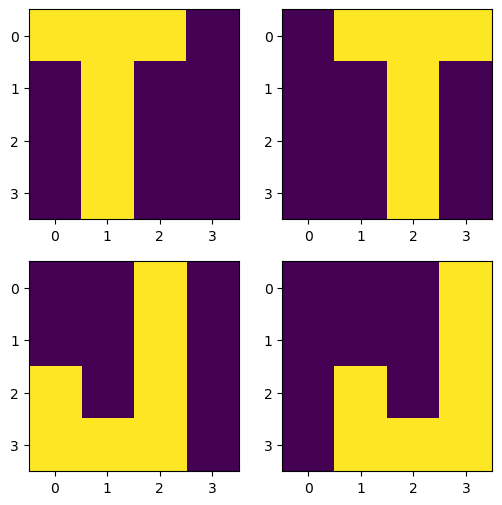

In [27]:
fig=plt.figure(0,(6,6))
for i in range(len(examples)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(examples[i])

In [28]:
# Setup labels - we want our machine to output positive voltage to T shapes, 
# our first 2 examples are Ts - so we'll set these values to +1, our second to 
# examples are Js - so we'll set these to -1s
y=np.array([1,1,-1,-1])

#Reshape each example into a row, and add a 17th column for the bias term
X=np.hstack((examples.reshape(-1, 16), np.ones((len(y),1)))) 

#Initialized weights to zeros, this is equivalent to turning each knob to 12 o'clock
w = np.zeros(17)
lr=1.0 #Learning rate

In [29]:
for i in range(1,10):
    yhat=np.dot(X[i%len(y)],w) 
    if yhat<=0 and y[i%len(y)]>0: 
        print(f"output is {yhat} but we want it to be {y[i%len(y)]}, updating weights.")
        w=w+lr*X[i%len(y)] 
    elif yhat>0 and y[i%len(y)]<=0: 
        print(f"output is {yhat} but we want it to be {y[i%len(y)]}, updating weights.")
        w=w-lr*X[i%len(y)] 
    else: 
        print(f"output is {yhat}, which has the same sign as our target {y[i%len(y)]}, machine is correct, not updating weights.")

output is 0.0 but we want it to be 1, updating weights.
output is 7.0 but we want it to be -1, updating weights.
output is 2.0 but we want it to be -1, updating weights.
output is 3.0, which has the same sign as our target 1, machine is correct, not updating weights.
output is 11.0, which has the same sign as our target 1, machine is correct, not updating weights.
output is -7.0, which has the same sign as our target -1, machine is correct, not updating weights.
output is -15.0, which has the same sign as our target -1, machine is correct, not updating weights.
output is 3.0, which has the same sign as our target 1, machine is correct, not updating weights.
output is 11.0, which has the same sign as our target 1, machine is correct, not updating weights.


## Example 3 - Two input perceptron - solvable case. 
Replicates Results of Figure 1.10, Task 1

In [30]:
examples=np.array([[[-1,-1]],
             [[-1,1]],
             [[1,-1]],
             [[1,1]]])

y=np.array([-1,1,1,1]) #we want our machine to output a + when either or bothe switches are on

#Reshape each example into a row, and add a 3rd column for the bias term
X=np.hstack((examples.reshape(-1, 2), np.ones((len(y),1)))) 

#Initialized weights to zeros, this is equivalent to turning each knob to 12 o'clock
w = np.zeros(3)
lr=1.0 #Learning rate

In [31]:
X

array([[-1., -1.,  1.],
       [-1.,  1.,  1.],
       [ 1., -1.,  1.],
       [ 1.,  1.,  1.]])

In [32]:
w

array([0., 0., 0.])

In [33]:
for i in range(1, 12): #Starting at index 1, we could also start at index 0, results are a little more clear this way.
    yhat=np.dot(X[i%len(y)],w) 
    print(f"step: {i}, current example: {X[i%len(y)][:2]}, current weights = {w}")
    if yhat<=0 and y[i%len(y)]>0: 
        print(f"output is {yhat} but we want it to be {y[i%len(y)]}, updating weights.")
        w=w+lr*X[i%len(y)] 
    elif yhat>0 and y[i%len(y)]<=0: 
        print(f"output is {yhat} but we want it to be {y[i%len(y)]}, updating weights.")
        w=w-lr*X[i%len(y)] 
    else: 
        print(f"output is {yhat}, which has the same sign as our target {y[i%len(y)]}, machine is correct, not updating weights.")

step: 1, current example: [-1.  1.], current weights = [0. 0. 0.]
output is 0.0 but we want it to be 1, updating weights.
step: 2, current example: [ 1. -1.], current weights = [-1.  1.  1.]
output is -1.0 but we want it to be 1, updating weights.
step: 3, current example: [1. 1.], current weights = [0. 0. 2.]
output is 2.0, which has the same sign as our target 1, machine is correct, not updating weights.
step: 4, current example: [-1. -1.], current weights = [0. 0. 2.]
output is 2.0 but we want it to be -1, updating weights.
step: 5, current example: [-1.  1.], current weights = [1. 1. 1.]
output is 1.0, which has the same sign as our target 1, machine is correct, not updating weights.
step: 6, current example: [ 1. -1.], current weights = [1. 1. 1.]
output is 1.0, which has the same sign as our target 1, machine is correct, not updating weights.
step: 7, current example: [1. 1.], current weights = [1. 1. 1.]
output is 3.0, which has the same sign as our target 1, machine is correct,

## Example 4 - Two input perceptron - unsolvable XOR case. 
Replicates Results of Figure 1.10, Task 2

In [34]:
examples=np.array([[[-1,-1]],
             [[-1,1]],
             [[1,-1]],
             [[1,1]]])

y=np.array([-1,1,1,-1]) #we want our machine to output a + when either one but not both switches are one

#Reshape each example into a row, and add a 3rd column for the bias term
X=np.hstack((examples.reshape(-1, 2), np.ones((len(y),1)))) 

#Initialized weights to zeros, this is equivalent to turning each knob to 12 o'clock
w = np.zeros(3)
lr=1.0 #Learning rate

In [35]:
for i in range(1, 14): #Starting at index 1, we could also start at index 0, results are a little more clear this way.
    yhat=np.dot(X[i%len(y)],w) 
    print(f"step: {i}, current example: {X[i%len(y)][:2]}, current weights = {w}")
    if yhat<=0 and y[i%len(y)]>0: 
        print(f"output is {yhat} but we want it to be {y[i%len(y)]}, updating weights.")
        w=w+lr*X[i%len(y)] 
    elif yhat>0 and y[i%len(y)]<=0: 
        print(f"output is {yhat} but we want it to be {y[i%len(y)]}, updating weights.")
        w=w-lr*X[i%len(y)] 
    else: 
        print(f"output is {yhat}, which has the same sign as our target {y[i%len(y)]}, machine is correct, not updating weights.")

step: 1, current example: [-1.  1.], current weights = [0. 0. 0.]
output is 0.0 but we want it to be 1, updating weights.
step: 2, current example: [ 1. -1.], current weights = [-1.  1.  1.]
output is -1.0 but we want it to be 1, updating weights.
step: 3, current example: [1. 1.], current weights = [0. 0. 2.]
output is 2.0 but we want it to be -1, updating weights.
step: 4, current example: [-1. -1.], current weights = [-1. -1.  1.]
output is 3.0 but we want it to be -1, updating weights.
step: 5, current example: [-1.  1.], current weights = [0. 0. 0.]
output is 0.0 but we want it to be 1, updating weights.
step: 6, current example: [ 1. -1.], current weights = [-1.  1.  1.]
output is -1.0 but we want it to be 1, updating weights.
step: 7, current example: [1. 1.], current weights = [0. 0. 2.]
output is 2.0 but we want it to be -1, updating weights.
step: 8, current example: [-1. -1.], current weights = [-1. -1.  1.]
output is 3.0 but we want it to be -1, updating weights.
step: 9, c

Note that our weights are stuck in a loop!